<a href="https://colab.research.google.com/github/MinhQuang31751/Python/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_ch%C3%B3_m%C3%A8o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CÁC BƯỚC THỰC HIỆN**

**1) Chuẩn bị và xử lý dữ liệu**

- Thu thập, sắp xếp và chuẩn hóa ảnh chó/mèo thành các thư mục đúng cấu trúc.

- Sử dụng Keras ImageDataGenerator để tự động tiền xử lý và chia tách tập huấn luyện/kiểm tra.​

**2) Xây dựng và huấn luyện mô hình CNN 2 lớp**

- Thiết kế mô hình với hai lớp tích chập xen kẽ các lớp pooling.

- Tiến hành huấn luyện mô hình trên tập dữ liệu đã xử lý, theo dõi chỉ số accuracy và loss.​

**3) Đánh giá mô hình với biểu đồ**

- Vẽ biểu đồ trực quan hóa các chỉ số accuracy và loss của quá trình huấn luyện và kiểm tra để phát hiện hiện tượng overfitting hoặc underfitting.​

**4) Dự đoán trên ảnh mới**

- Nạp và chuẩn hóa ảnh mới, dùng mô hình đã huấn luyện để dự đoán thuộc loại chó hay mèo.​

#**1.Chuẩn bị dữ liệu đầu vào với Keras**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    '/content/drive/MyDrive/Python/archive (1)/PetImages',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    '/content/drive/MyDrive/Python/archive (1)/PetImages',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 200 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


cấu trúc thư mục ảnh đã đúng chuẩn để huấn luyện phân loại ảnh với Keras, và dữ liệu đã được chia tự động theo tỷ lệ validation_split=0.2

#**2.Tạo và huấn luyện mô hình CNN 2 lớp**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, validation_data=val_gen, epochs=10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9309 - loss: 0.4941 - val_accuracy: 0.9388 - val_loss: 0.2140
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 805ms/step - accuracy: 0.9527 - loss: 0.1997 - val_accuracy: 0.9388 - val_loss: 0.2232
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 821ms/step - accuracy: 0.9351 - loss: 0.2559 - val_accuracy: 0.9388 - val_loss: 0.2109
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9451 - loss: 0.1989 - val_accuracy: 0.9388 - val_loss: 0.2136
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 715ms/step - accuracy: 0.9508 - loss: 0.2082 - val_accuracy: 0.9388 - val_loss: 0.2190
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 795ms/step - accuracy: 0.9522 - loss: 0.1858 - val_accuracy: 0.9388 - val_loss: 0.2276
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 882ms/step - accuracy: 0.9342 - loss: 0.2059 - val_accuracy: 0.9388 - val_loss: 0.2111
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 718ms/step - accuracy: 0.9266 - loss: 0.2153 - val_accuracy: 0.9388 - val_loss: 0.205

**Giải thích:**

- accuracy: Độ chính xác bộ train qua từng vòng.

- loss: Giá trị tổn thất bộ train qua từng vòng.

- val_accuracy: Độ chính xác bộ validation (kiểm thử).

- val_loss: Giá trị tổn thất bộ validation.

- Số Epoch = 10 là đã huấn luyện 10 vòng.

**Đánh giá:**

- Độ chính xác của bộ kiểm thử (“val_accuracy”) luôn ~0.94 nghĩa là mô hình đã học rất tốt với dữ liệu này.

#**3.Vẽ biểu đồ loss và accuracy**

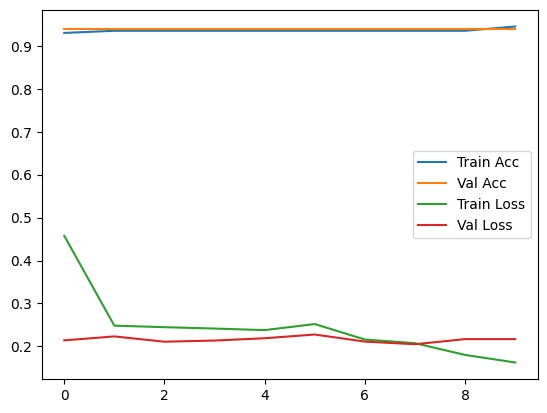

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

**Đánh giá kết quả huấn luyện**

- Độ chính xác (accuracy) cao và ổn định: Cả hai đường Train Acc và Val Acc đều giữ mức trên 92% xuyên suốt các epoch, cho thấy mô hình học tốt, dự đoán hiệu quả cả trên tập kiểm tra lẫn huấn luyện.​

- Sai số (loss) giảm nhanh rồi ổn định: Train Loss giảm nhanh ở các epoch đầu rồi giữ mức khá thấp. Val Loss cũng ổn định, không dao động lớn, điều này chứng tỏ quá trình huấn luyện không gặp hiện tượng overfitting rõ ràng.​

- Train và Val tương đối sát nhau: Khoảng cách giữa các chỉ số trên hai tập này không lớn, phản ánh mô hình tổng quát hóa tốt, không bị học thuộc lòng dữ liệu training.

#**4.Dự đoán ảnh mới**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


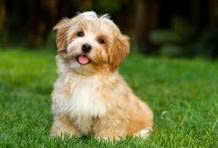

In [ ]:
from google.colab import drive
from IPython.display import Image, display
import os

# Mount Google Drive
drive.mount('/content/drive')

# Hiển thị ảnh từ Drive
image_path = '/content/drive/MyDrive/Python/cho.jpg'
display(Image(image_path))

# Hoặc dùng PIL
from PIL import Image
img = Image.open(image_path)
img.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img('/content/drive/MyDrive/Python/cho.jpg', target_size=(128,128))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print('Chó' if prediction[0][0] > 0.5 else 'Mèo')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Chó


**nhận diện ảnh trên là chó**